In [9]:
import os
import gzip

import numpy as np
import pandas as pd
import h5py
import scipy.sparse as ss
import seaborn as sns

path = '../data/ecDNA'
os.listdir(path)

['GSE160148_scATAC_COLO320.mtx.gz',
 'GSE160148_scRNA_COLO320.mtx.gz',
 'barcodes_ATAC.tsv.gz',
 'barcodes_RNA.tsv.gz',
 'features_RNA.tsv.gz',
 'peaks_ATAC.tsv.gz']

In [10]:
def zless(file, bin=True):
    if bin is True:
        with gzip.open(f'{path}/{file}', 'rb') as f:
            for lineno, i in enumerate(f):
                if lineno < 20:
                    print(i)
                else:
                    break
    else:
        with open(f'{path}/{file}', 'r') as f:
            for lineno, i in enumerate(f):
                if lineno < 100:
                    print(i, end='')
                else:
                    break

def visit_h5(filename=None, f=None):
    def visit_func(x):
        obj = f[x]
        if isinstance(obj, h5py.Dataset):
            print(obj.name, obj.shape, obj.dtype)
        else:
            print('\ngroup', obj.name, len(obj.keys()), 'members')
    
    if f is None:
        with h5py.File(f'{path}/{filename}') as f:
            f.visit(visit_func)
    else:
        f.visit(visit_func)

## features_RNA.tsv.gz

In [66]:
zless('features_RNA.tsv.gz')

b'\tx\n'
b'1\tMIR1302-10\n'
b'2\tFAM138A\n'
b'3\tOR4F5\n'
b'4\tRP11-34P13.7\n'
b'5\tRP11-34P13.8\n'
b'6\tAL627309.1\n'
b'7\tRP11-34P13.14\n'
b'8\tRP11-34P13.9\n'
b'9\tAP006222.2\n'
b'10\tRP4-669L17.10\n'
b'11\tOR4F29\n'
b'12\tRP4-669L17.2\n'
b'13\tRP5-857K21.15\n'
b'14\tRP5-857K21.1\n'
b'15\tRP5-857K21.2\n'
b'16\tRP5-857K21.3\n'
b'17\tRP5-857K21.4\n'
b'18\tRP5-857K21.5\n'
b'19\tOR4F16\n'


In [75]:
rna_cols = pd.read_csv(
    f'{path}/features_RNA.tsv.gz',
    sep='\t',
    skiprows=1,
    usecols=[1],
    names=['1']
).squeeze()
rna_cols

0          MIR1302-10
1             FAM138A
2               OR4F5
3        RP11-34P13.7
4        RP11-34P13.8
             ...     
32734           BAGE5
32735      CU459201.1
32736      AC002321.2
32737      AC002321.1
32738            PVT1
Name: 1, Length: 32739, dtype: object

## peaks_ATAC.tsv.g

In [11]:
zless('peaks_ATAC.tsv.gz')

b'\tx\n'
b'1\tchr1_761997_762497\n'
b'2\tchr1_762683_763183\n'
b'3\tchr1_773553_774053\n'
b'4\tchr1_793288_793788\n'
b'5\tchr1_805035_805535\n'
b'6\tchr1_811605_812105\n'
b'7\tchr1_812130_812630\n'
b'8\tchr1_845830_846330\n'
b'9\tchr1_846547_847047\n'
b'10\tchr1_847360_847860\n'
b'11\tchr1_848162_848662\n'
b'12\tchr1_848881_849381\n'
b'13\tchr1_849546_850046\n'
b'14\tchr1_850855_851355\n'
b'15\tchr1_851376_851876\n'
b'16\tchr1_851909_852409\n'
b'17\tchr1_852476_852976\n'
b'18\tchr1_853220_853720\n'
b'19\tchr1_853947_854447\n'


In [76]:
atac_col = pd.read_csv(
    f'{path}/peaks_ATAC.tsv.gz',
    sep='\t',
    skiprows=1,
    usecols=[1],
    names=['1']
).squeeze()
atac_col

0               chr1_761997_762497
1               chr1_762683_763183
2               chr1_773553_774053
3               chr1_793288_793788
4               chr1_805035_805535
                    ...           
363022    chrX_154891943_154892443
363023    chrX_154977082_154977582
363024    chrX_154996407_154996907
363025    chrX_154997014_154997514
363026    chrX_154997637_154998137
Name: 1, Length: 363027, dtype: object

## barcodes_ATAC.tsv.gz

In [24]:
zless('barcodes_ATAC.tsv.gz')

b'\tx\n'
b'1\tCOLO320HSR_5K_rep8#GATCGATTCGGTAACT-1\n'
b'2\tCOLO320HSR_5K_rep8#GGCAGGATCATTACGA-1\n'
b'3\tCOLO320HSR_5K_rep8#GTCCAAGTCGTTATAG-1\n'
b'4\tCOLO320HSR_5K_rep8#TTTAACGAGTCCTGAG-1\n'
b'5\tCOLO320HSR_5K_rep8#TAGGCTGTCACTTCAT-1\n'
b'6\tCOLO320HSR_5K_rep8#GCACCTAAGTCAATTG-1\n'
b'7\tCOLO320HSR_5K_rep8#TGGCCATCATTAAGCT-1\n'
b'8\tCOLO320HSR_5K_rep8#AAGTTTGTCGGCCAGT-1\n'
b'9\tCOLO320HSR_5K_rep8#GTTTCCTCATTAAAGG-1\n'
b'10\tCOLO320HSR_5K_rep8#GGTATGTTCATCCTCA-1\n'
b'11\tCOLO320HSR_5K_rep8#CCTGTATGTCATAAGT-1\n'
b'12\tCOLO320HSR_5K_rep8#TCGCTAACACATAACT-1\n'
b'13\tCOLO320HSR_5K_rep8#CGCAATGTCTTGAGGT-1\n'
b'14\tCOLO320HSR_5K_rep8#GCTTTGTGTTTGTGGA-1\n'
b'15\tCOLO320HSR_5K_rep8#ACGGGAAGTGCAATGC-1\n'
b'16\tCOLO320HSR_5K_rep8#ACAACAACATGAATCT-1\n'
b'17\tCOLO320HSR_5K_rep8#CCAAGTTAGAGAGCCG-1\n'
b'18\tCOLO320HSR_5K_rep8#ATTACCGCACTAGCGT-1\n'
b'19\tCOLO320HSR_5K_rep8#GTATTGCAGCGGATTT-1\n'


In [77]:
atac_index = pd.read_csv(
    f'{path}/barcodes_ATAC.tsv.gz',
    skiprows=1,
    sep='\t',
    usecols=[1],
    names=['1']
).squeeze()
atac_index

0        COLO320HSR_5K_rep8#GATCGATTCGGTAACT-1
1        COLO320HSR_5K_rep8#GGCAGGATCATTACGA-1
2        COLO320HSR_5K_rep8#GTCCAAGTCGTTATAG-1
3        COLO320HSR_5K_rep8#TTTAACGAGTCCTGAG-1
4        COLO320HSR_5K_rep8#TAGGCTGTCACTTCAT-1
                         ...                  
72044     COLO320DM_5K_rep6#GGAGCAAGTCGTAATG-1
72045     COLO320DM_5K_rep6#GGTGTCCAGCCAAATC-1
72046     COLO320DM_5K_rep6#TTGTGCGAGATAAAGC-1
72047     COLO320DM_5K_rep6#CGCTACTTCGTTTCTG-1
72048     COLO320DM_5K_rep6#ACTAACGGTCACGGAT-1
Name: 1, Length: 72049, dtype: object

In [78]:
atac_index.sort_values()

17736     COLO320DM_5K_rep1#AAACAGCCACTAGCGT-1
18530     COLO320DM_5K_rep1#AAACATGCATTGTGCA-1
15260     COLO320DM_5K_rep1#AAACCAACACTATGGC-1
14861     COLO320DM_5K_rep1#AAACCGCGTATTACCC-1
17394     COLO320DM_5K_rep1#AAACCGCGTCCCGGAA-1
                         ...                  
4814     COLO320HSR_5K_rep8#TTTGTTGGTAGCTGCG-1
1408     COLO320HSR_5K_rep8#TTTGTTGGTGCATTAG-1
651      COLO320HSR_5K_rep8#TTTGTTGGTTATGTGG-1
2164     COLO320HSR_5K_rep8#TTTGTTGGTTGTTCAC-1
316      COLO320HSR_5K_rep8#TTTGTTGGTTTCCGGC-1
Name: 1, Length: 72049, dtype: object

## barcodes_RNA.tsv.gz

In [25]:
zless('barcodes_RNA.tsv.gz')

b'\tx\n'
b'COLO320DM_5K_rep1_AAACAGCCACTAGCGT-1\tCOLO320DM_5K_rep1#AAACAGCCACTAGCGT-1\n'
b'COLO320DM_5K_rep1_AAACATGCATTGTGCA-1\tCOLO320DM_5K_rep1#AAACATGCATTGTGCA-1\n'
b'COLO320DM_5K_rep1_AAACCAACACTATGGC-1\tCOLO320DM_5K_rep1#AAACCAACACTATGGC-1\n'
b'COLO320DM_5K_rep1_AAACCGCGTATTACCC-1\tCOLO320DM_5K_rep1#AAACCGCGTATTACCC-1\n'
b'COLO320DM_5K_rep1_AAACCGCGTCCCGGAA-1\tCOLO320DM_5K_rep1#AAACCGCGTCCCGGAA-1\n'
b'COLO320DM_5K_rep1_AAACCGCGTTCCTGTG-1\tCOLO320DM_5K_rep1#AAACCGCGTTCCTGTG-1\n'
b'COLO320DM_5K_rep1_AAACCGCGTTGGATAT-1\tCOLO320DM_5K_rep1#AAACCGCGTTGGATAT-1\n'
b'COLO320DM_5K_rep1_AAACCGGCAGCAACCT-1\tCOLO320DM_5K_rep1#AAACCGGCAGCAACCT-1\n'
b'COLO320DM_5K_rep1_AAACCGGCATTAAGTC-1\tCOLO320DM_5K_rep1#AAACCGGCATTAAGTC-1\n'
b'COLO320DM_5K_rep1_AAACGGATCACGTTAA-1\tCOLO320DM_5K_rep1#AAACGGATCACGTTAA-1\n'
b'COLO320DM_5K_rep1_AAACGGATCCTGGTCT-1\tCOLO320DM_5K_rep1#AAACGGATCCTGGTCT-1\n'
b'COLO320DM_5K_rep1_AAACGTACACCTATAG-1\tCOLO320DM_5K_rep1#AAACGTACACCTATAG-1\n'
b'COLO320DM_5K_rep1_AAACGTACACT

In [84]:
rna_index = pd.read_csv(
    f'{path}/barcodes_RNA.tsv.gz',
    sep='\t',
    skiprows=1,
    names=['1','2']
)
rna_index

,1,2
0,COLO320DM_5K_rep1_AAACAGCCACTAGCGT-1,COLO320DM_5K_rep1#AAACAGCCACTAGCGT-1
1,COLO320DM_5K_rep1_AAACATGCATTGTGCA-1,COLO320DM_5K_rep1#AAACATGCATTGTGCA-1
2,COLO320DM_5K_rep1_AAACCAACACTATGGC-1,COLO320DM_5K_rep1#AAACCAACACTATGGC-1
3,COLO320DM_5K_rep1_AAACCGCGTATTACCC-1,COLO320DM_5K_rep1#AAACCGCGTATTACCC-1
4,COLO320DM_5K_rep1_AAACCGCGTCCCGGAA-1,COLO320DM_5K_rep1#AAACCGCGTCCCGGAA-1
...,...,...
72044,COLO320HSR_5K_rep8_TTTGTTGGTAGCTGCG-1,COLO320HSR_5K_rep8#TTTGTTGGTAGCTGCG-1
72045,COLO320HSR_5K_rep8_TTTGTTGGTGCATTAG-1,COLO320HSR_5K_rep8#TTTGTTGGTGCATTAG-1
72046,COLO320HSR_5K_rep8_TTTGTTGGTTATGTGG-1,COLO320HSR_5K_rep8#TTTGTTGGTTATGTGG-1
72047,COLO320HSR_5K_rep8_TTTGTTGGTTGTTCAC-1,COLO320HSR_5K_rep8#TTTGTTGGTTGTTCAC-1


In [85]:
all(i[1].rsplit('_', 1) == i[2].split('#') for i in rna_index.itertuples())

True

In [86]:
rna_index = rna_index['2']
rna_index

0         COLO320DM_5K_rep1#AAACAGCCACTAGCGT-1
1         COLO320DM_5K_rep1#AAACATGCATTGTGCA-1
2         COLO320DM_5K_rep1#AAACCAACACTATGGC-1
3         COLO320DM_5K_rep1#AAACCGCGTATTACCC-1
4         COLO320DM_5K_rep1#AAACCGCGTCCCGGAA-1
                         ...                  
72044    COLO320HSR_5K_rep8#TTTGTTGGTAGCTGCG-1
72045    COLO320HSR_5K_rep8#TTTGTTGGTGCATTAG-1
72046    COLO320HSR_5K_rep8#TTTGTTGGTTATGTGG-1
72047    COLO320HSR_5K_rep8#TTTGTTGGTTGTTCAC-1
72048    COLO320HSR_5K_rep8#TTTGTTGGTTTCCGGC-1
Name: 2, Length: 72049, dtype: object

In [87]:
all(i == j for i, j in zip(atac_index.sort_values(), rna_index.sort_values()))

True

In [11]:
visit_h5('hahah.loom')


group /col_attrs 14 members
/col_attrs/CellID (9432,)
/col_attrs/ClusterID (9432,)
/col_attrs/ClusterName (9432,)
/col_attrs/RNA_snn_res_0_4 (9432,)
/col_attrs/celltype (9432,)
/col_attrs/nCount_RNA (9432,)
/col_attrs/nFeature_RNA (9432,)
/col_attrs/observed (9432,)
/col_attrs/orig_ident (9432,)
/col_attrs/pca_cell_embeddings (9432, 100)
/col_attrs/percent_mito (9432,)
/col_attrs/simulated (9432,)
/col_attrs/tsne_cell_embeddings (9432, 2)
/col_attrs/umap_cell_embeddings (9432, 2)

group /col_graphs 2 members

group /col_graphs/RNA_nn 3 members
/col_graphs/RNA_nn/a (282960,)
/col_graphs/RNA_nn/b (282960,)
/col_graphs/RNA_nn/w (282960,)

group /col_graphs/RNA_snn 3 members
/col_graphs/RNA_snn/a (1257370,)
/col_graphs/RNA_snn/b (1257370,)
/col_graphs/RNA_snn/w (1257370,)

group /layers 2 members
/layers/norm_data (19089, 9432)
/layers/scale_data (19089, 9432)
/matrix (19089, 9432)

group /row_attrs 7 members
/row_attrs/Gene (19089,)
/row_attrs/Selected (19089,)
/row_attrs/mean (19089,)
/

In [13]:
zless('atac_v1_pbmc_10k_fragments.tsv.gz.tbi')

b'TBI\x01\x18\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00#\x00\x00\x00\x00\x00\x00\x00\x85\x00\x00\x00chr1\x00chr2\x00chr3\x00chr4\x00chr5\x00chr6\x00chr7\x00chr8\x00chr9\x00chr10\x00chr11\x00chr12\x00chr13\x00chr14\x00chr15\x00chr16\x00chr17\x00chr18\x00chr19\x00chr20\x00chr21\x00chr22\x00chrX\x00chrY\x00\x89\x06\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\xa0\x93\x9e\x90\xef\x03\x00\x00\xdc\x95\x9e\x90\xef\x03\x00\x00\x15\xd8\t\xe8\x81\x08\x00\x00\x1d\xdd\t\xe8\x81\x08\x00\x00\x01\x00\x00\x00\x06\x00\x00\x001\xd3yE\x8c\x00\x00\x00\xcd\xd6yE\x8c\x00\x00\x00{_\xed\x84\r\x01\x00\x00\xb7a\xed\x84\r\x01\x00\x00_\xbb\xde\xc8\x8f\x01\x00\x00\x93\xbc\xde\xc8\x8f\x01\x00\x00\xe2\x0f\xbdRI\x02\x00\x00~\x1e\xbdRI\x02\x00\x00\xc4\x84\x93V\xca\x02\x00\x00\xd4\x86\x93V\xca\x02\x00\x009K\xda\xf0B\x03\x00\x00uM\xda\xf0B\x03\x00\x00\x02\x00\x00\x00\x06\x00\x00\x00\xbdx\x83\x87)\x04\x00\x00Iz\x83\x87)\x04\x00\x00\x1d\xe9\x9b\xc0\\\x04\x00\x00I\xe9\x9b\xc0\\\x04\x00\x00ZTv\x

In [15]:
zless('atac_v1_pbmc_10k_singlecell.csv', bin=False)

barcode,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,cell_id,is__cell_barcode,TSS_fragments,DNase_sensitive_region_fragments,enhancer_region_fragments,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments
NO_BARCODE,8335327,3922818,71559,746476,634014,22972,2937488,None,0,0,0,0,0,0,0,0
AAACGAAAGAAACGCC-1,3,1,0,1,0,0,1,None,0,1,1,1,0,1,0,1
AAACGAAAGAAAGCAG-1,14,1,0,4,2,0,7,None,0,0,2,0,0,2,0,0
AAACGAAAGAAAGGGT-1,7,1,0,1,0,0,5,None,0,2,2,0,1,2,0,1
AAACGAAAGAAATACC-1,9880,5380,79,106,1120,6,3189,None,0,386,1623,297,107,1758,16,262
AAACGAAAGAAATCTG-1,2,0,0,0,0,0,2,None,0,1,2,1,1,2,0,2
AAACGAAAGAAATGGG-1,4,2,0,1,0,0,1,None,0,0,1,1,0,1,0,1
AAACGAAAGAAATTCG-1,2,0,0,0,1,0,1,None,0,0,0,0,0,0,0,0
AAACGAAAGAACCATA-1,12,3,0,8,0,0,1,None,0,0,1,0,0,1,0,0
AAACGAAAGAACCCGA-1,3,1,0,2,0,0,0,None,0,0,0,0,0,0,0,0
AAACGAAAGAACGACC-1,2,0,0,0,0,0,2,None,0,2,2,1,1,2,0,1
AAACGAAAGAACGCCA-1,7,0,0,1,0,0,6,None,0,0,4,0,0,4,0,0
AAACGAAAGAACGTCG-1,3

# 

# 

## atac_v1_pbmc_10k_filtered_peak_bc_matrix.h5

In [12]:
visit_h5('atac_v1_pbmc_10k_filtered_peak_bc_matrix.h5')


group /matrix 6 members
/matrix/barcodes (8728,)
/matrix/data (52689515,)

group /matrix/features 6 members
/matrix/features/_all_tag_keys (2,)
/matrix/features/derivation (89796,)
/matrix/features/feature_type (89796,)
/matrix/features/genome (89796,)
/matrix/features/id (89796,)
/matrix/features/name (89796,)
/matrix/indices (52689515,)
/matrix/indptr (8729,)
/matrix/shape (2,)


In [16]:
filename = 'atac_v1_pbmc_10k_filtered_peak_bc_matrix.h5'
with h5py.File(f'{path}/{filename}') as f:
    print(f['/matrix/features/_all_tag_keys'][:])

[b'genome' b'derivation']


In [57]:
with h5py.File(f'{path}/{filename}') as f:
    data = f['/matrix/data'][:]
    indices = f['/matrix/indices']
    indptr = f['/matrix/indptr']
    shape = f['/matrix/shape']
    atac_matrix = ss.csc_matrix((data, indices, indptr), shape=shape)

In [97]:
with h5py.File(f'{path}/{filename}', 'r') as f:
    features = f['/matrix/features']
    atac_meta = {
        'gene': pd.DataFrame(
            {
                'derivation': features['derivation'],
                'feature_type': features['feature_type'],
                'genome': features['genome'],
                'id': features['id'],
                'name': features['name']
            },
        ),
        'cell': pd.DataFrame({})
    }

In [98]:
with h5py.File(f'{path}/{filename}', 'r') as f:
    print(f['/matrix/data'].dtype)
    print(dir(f['/matrix/features/derivation']))
    print(help(f['/matrix/features/derivation'].read_direct))

int32
['__array__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache_props', '_d', '_dcpl', '_dxpl', '_e', '_extent_type', '_fast_read_ok', '_fast_reader', '_filters', '_id', '_is_empty', '_lapl', '_lcpl', '_local', '_readonly', '_selector', 'asstr', 'astype', 'attrs', 'chunks', 'compression', 'compression_opts', 'dims', 'dtype', 'external', 'fields', 'file', 'fillvalue', 'fletcher32', 'flush', 'id', 'is_virtual', 'iter_chunks', 'len', 'make_scale', 'maxshape', 'name', 'nbytes', 'ndim', 'parent', 'read_direct', 'ref', 'refresh', 'regionref', 'resize', 'scaleoffset', 'shape', '

In [99]:
atac_meta['gene'] = atac_meta['gene'].apply(lambda x: x.str.decode('utf-8'))

In [100]:
atac_meta['gene']

,derivation,feature_type,genome,id,name
0,,Peaks,hg19,chr1:565107-565550,chr1:565107-565550
1,,Peaks,hg19,chr1:569174-569639,chr1:569174-569639
2,,Peaks,hg19,chr1:713460-714823,chr1:713460-714823
3,,Peaks,hg19,chr1:752422-753038,chr1:752422-753038
4,,Peaks,hg19,chr1:762106-763359,chr1:762106-763359
...,...,...,...,...,...
89791,,Peaks,hg19,chrY:58993392-58993760,chrY:58993392-58993760
89792,,Peaks,hg19,chrY:58994571-58994823,chrY:58994571-58994823
89793,,Peaks,hg19,chrY:58996352-58997331,chrY:58996352-58997331
89794,,Peaks,hg19,chrY:59001782-59002175,chrY:59001782-59002175


In [102]:
atac_meta['gene'][['derivation', 'feature_type', 'genome']].value_counts()

derivation  feature_type  genome
            Peaks         hg19      89796
dtype: int64

# 

# 

# atac_v1_pbmc_10k_fragments.tsv.gz

In [14]:
zless('atac_v1_pbmc_10k_fragments.tsv.gz')

b'chr1\t10066\t10279\tTTAGCTTAGGAGAACA-1\t2\n'
b'chr1\t10072\t10279\tTTAGCTTAGGAGAACA-1\t2\n'
b'chr1\t10079\t10316\tATATTCCTCTTGTACT-1\t2\n'
b'chr1\t10084\t10340\tCGTACAAGTTACCCAA-1\t1\n'
b'chr1\t10085\t10271\tTGTGACAGTACAACGG-1\t1\n'
b'chr1\t10085\t10339\tCATGCCTTCTCTGACC-1\t1\n'
b'chr1\t10089\t10502\tATCGAGTAGGTTCGAG-1\t1\n'
b'chr1\t10091\t10334\tGCGGTGTCACACTAGT-1\t1\n'
b'chr1\t10091\t10681\tCTCTCAGGTCCCTTTG-1\t1\n'
b'chr1\t10096\t10278\tTTCGGTCTCACGTGTA-1\t1\n'
b'chr1\t10096\t10339\tCTTTGCGAGGTACACG-1\t1\n'
b'chr1\t10097\t10321\tTTGCGGGCAAGCGGTA-1\t1\n'
b'chr1\t10097\t10334\tAACCAACGTGTCTACA-1\t2\n'
b'chr1\t10101\t10483\tCTGTTCGGTGCGTTTA-1\t2\n'
b'chr1\t10132\t10279\tTGGCCTTAGAGCACTG-1\t2\n'
b'chr1\t10136\t10483\tCTGTTCGGTGCGTTTA-1\t1\n'
b'chr1\t10143\t10327\tTGTACAGGTGGCATAG-1\t1\n'
b'chr1\t10145\t10473\tGGGTTATGTCTCTGGG-1\t1\n'
b'chr1\t10151\t10209\tCGCGCAACAAGATTAG-1\t2\n'
b'chr1\t10151\t10565\tGTAATCGAGTTGTCCA-1\t1\n'


In [6]:
'1\n'.strip()

'1'

In [7]:
chr19_num = 0
with gzip.open(f'{path}/atac_v1_pbmc_10k_fragments.tsv.gz', 'rb') as abigf:
    for line in abigf:
        text = line.decode('utf-8').strip()
        if not text.endswith('0'):
            chr19_num += 1

In [4]:
chr19_num

8766969

# 

# 

# hahah.loom

In [3]:
visit_h5('hahah.loom')


group /col_attrs 14 members
/col_attrs/CellID (9432,) |S22
/col_attrs/ClusterID (9432,) int32
/col_attrs/ClusterName (9432,) |S22
/col_attrs/RNA_snn_res_0_4 (9432,) |S2
/col_attrs/celltype (9432,) |S22
/col_attrs/nCount_RNA (9432,) float32
/col_attrs/nFeature_RNA (9432,) int32
/col_attrs/observed (9432,) float32
/col_attrs/orig_ident (9432,) |S7
/col_attrs/pca_cell_embeddings (9432, 100) float64
/col_attrs/percent_mito (9432,) float32
/col_attrs/simulated (9432,) float32
/col_attrs/tsne_cell_embeddings (9432, 2) float64
/col_attrs/umap_cell_embeddings (9432, 2) float64

group /col_graphs 2 members

group /col_graphs/RNA_nn 3 members
/col_graphs/RNA_nn/a (282960,) int32
/col_graphs/RNA_nn/b (282960,) int32
/col_graphs/RNA_nn/w (282960,) float64

group /col_graphs/RNA_snn 3 members
/col_graphs/RNA_snn/a (1257370,) int32
/col_graphs/RNA_snn/b (1257370,) int32
/col_graphs/RNA_snn/w (1257370,) float64

group /layers 2 members
/layers/norm_data (19089, 9432) float64
/layers/scale_data (1908

In [4]:
filename = 'hahah.loom'
with h5py.File(f'{path}/{filename}') as f:
    print(*list(f['col_attrs'].keys()), sep='\n')

CellID
ClusterID
ClusterName
RNA_snn_res_0_4
celltype
nCount_RNA
nFeature_RNA
observed
orig_ident
pca_cell_embeddings
percent_mito
simulated
tsne_cell_embeddings
umap_cell_embeddings


In [5]:
with h5py.File(f'{path}/{filename}') as f:
    rna_meta = dict(
        cell=pd.DataFrame({**f['col_attrs']}),
        gene=pd.DataFrame({**f['row_attrs']})
    )

In [6]:
rna_meta['gene']

,Gene,Selected,mean,pca_feature_loadings,variance,variance_expected,variance_standardized
0,b'AL627309.1',0.0,0.005407,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.005591,0.006066,0.921587
1,b'AL669831.5',0.0,0.062341,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.069064,0.071298,0.968670
2,b'FAM87B',1.0,0.001060,"(0.0006424844441527324, -4.710500288135822e-05...",0.001271,0.001126,1.129509
3,b'LINC00115',0.0,0.029898,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.032825,0.034802,0.943188
4,b'FAM41C',0.0,0.027778,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.028069,0.032381,0.866844
...,...,...,...,...,...,...,...
19084,b'AC011043.1',0.0,0.006785,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.007588,0.007685,0.987457
19085,b'AL592183.1',0.0,0.002226,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.002222,0.002429,0.914541
19086,b'AC007325.4',0.0,0.021628,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.022435,0.025309,0.886446
19087,b'AL354822.1',0.0,0.026506,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.027502,0.030934,0.889072


In [7]:
rna_meta['cell']

,CellID,ClusterID,ClusterName,RNA_snn_res_0_4,celltype,nCount_RNA,nFeature_RNA,observed,orig_ident,pca_cell_embeddings,percent_mito,simulated,tsne_cell_embeddings,umap_cell_embeddings
0,b'rna_AAACCCAAGCGCCCAT-1',2,b'CD4 Memory',b'1',b'CD4 Memory',2204.0,1087,0.035813,b'10x_RNA',"(-10.239039551340541, -6.22909326104028, -2.81...",0.023593,0.438202,"(0.357567688986562, -17.49437017876565)","(4.938107467916076, 1.3518887705641003)"
1,b'rna_AAACCCACAGAGTTGG-1',1,b'CD14+ Monocytes',b'0',b'CD14+ Monocytes',5884.0,1836,0.019227,b'10x_RNA',"(17.016908754428954, -1.6987142130219821, -4.5...",0.107580,0.101796,"(4.388103252807177, 30.04555985388053)","(-12.057811759684022, 8.665475959284803)"
2,b'rna_AAACCCACAGGTATGG-1',6,b'NK cell',b'5',b'NK dim',5530.0,2216,0.005448,b'10x_RNA',"(-8.417015200426153, -14.352449325987171, 21.6...",0.078481,0.139280,"(30.94372166026771, -20.184126302257965)","(4.968583084371154, 8.190487021906874)"
3,b'rna_AAACCCACATAGTCAC-1',4,b'pre-B cell',b'3',b'pre-B cell',5106.0,1615,0.014276,b'10x_RNA',"(-10.554548769074382, 18.764518497689238, 2.52...",0.108304,0.494949,"(-26.414658193397358, 11.16539002039044)","(7.6155118716026, -18.258239870564438)"
4,b'rna_AAACCCACATCCAATG-1',6,b'NK cell',b'5',b'NK bright',4572.0,1800,0.053857,b'10x_RNA',"(-10.724398993091782, -10.283306761358604, 14....",0.089895,0.139280,"(23.208112693328722, -27.101728641188718)","(6.6997308504844355, 8.463148231013319)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,b'rna_TTTGTTGGTGCGTCGT-1',3,b'CD4 Naive',b'2',b'CD4 Naive',5115.0,1336,0.030959,b'10x_RNA',"(-14.042978897696676, -2.6597788539628735, -6....",0.071359,0.255751,"(-27.015621178574502, -1.049171380999975)","(1.7605104220176386, -0.12607944537828253)"
9428,b'rna_TTTGTTGGTGTCATGT-1',1,b'CD14+ Monocytes',b'0',b'CD14+ Monocytes',3937.0,1331,0.098313,b'10x_RNA',"(12.056146037848986, -1.9841227873278102, -4.5...",0.198882,0.043587,"(15.808984152943578, 28.042283539442334)","(-10.407382034037049, 9.213014716609022)"
9429,b'rna_TTTGTTGGTTTGAACC-1',5,b'Double negative T cell',b'4',b'Double negative T cell',4245.0,1401,0.015783,b'10x_RNA',"(-12.976351096158592, -5.293445163243604, -0.2...",0.088339,0.392713,"(1.5689140006872606, -38.837554709248856)","(9.241358734395568, -3.861246948735216)"
9430,b'rna_TTTGTTGTCCAAGCCG-1',2,b'CD4 Memory',b'1',b'CD4 Memory',5600.0,1666,0.068054,b'10x_RNA',"(-13.395353340833484, -5.555892345139001, -4.0...",0.093571,0.392713,"(-11.610576181178597, -19.121071441507382)","(4.348998047139709, -0.34739387561509893)"


In [8]:
print(np.arange(-5, 5).shape)
ss.csr_matrix(np.arange(-5, 5)).shape

(10,)


(1, 10)

In [9]:
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [10]:
from tqdm import tqdm

with h5py.File(f'{path}/{filename}') as f:
    data = f['matrix']
    int_data = data.astype('int16')
    x = []
    for i in tqdm(range(0, data.shape[0], 2000)):
        x.append(ss.csr_matrix(int_data[i: 2000 + i]))

100%|██████████| 10/10 [00:26<00:00,  2.68s/it]


In [11]:
print(len(x))
x[0].shape

10


(2000, 9432)

In [12]:
y = ss.vstack(x)

In [13]:
y = y.T

In [14]:
y.shape

(9432, 19089)

In [16]:
rna_data = pd.DataFrame.sparse.from_spmatrix(y, index=rna_meta['cell'].CellID, columns=rna_meta['gene'].Gene)
rna_data.index = rna_data.index.to_series().str.decode('utf-8')
rna_data.columns = rna_data.columns.to_series().str.decode('utf-8')

In [17]:
rna_data.head()

Gene,AL627309.1,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,SAMD11,NOC2L,KLHL17,PLEKHN1,...,MT-ND6,MT-CYB,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC240274.1
CellID,,,,,,,,,,,,,,,,,,,,,
rna_AAACCCAAGCGCCCAT-1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
rna_AAACCCACAGAGTTGG-1,0,0,0,0,0,0,0,0,0,0,...,0,44,0,0,0,0,0,0,0,0
rna_AAACCCACAGGTATGG-1,0,0,0,0,0,0,0,1,0,0,...,1,31,0,0,0,0,0,0,0,0
rna_AAACCCACATAGTCAC-1,0,0,0,0,0,0,0,1,0,0,...,1,37,0,0,0,0,0,0,0,0
rna_AAACCCACATCCAATG-1,0,0,0,0,0,0,0,0,0,0,...,1,24,0,0,0,0,0,0,1,0


In [18]:
count_rna = rna_data.sum(axis=1)

In [19]:
all(i == j for i, j in zip(rna_meta['cell'].nCount_RNA, count_rna))

True

In [20]:
feature_rna = (rna_data != 0).sum(axis=1)

In [21]:
all(i == j for i, j in zip(rna_meta['cell'].nFeature_RNA, feature_rna))

True

In [74]:
umap1, umap2 = zip(*rna_meta['cell'].umap_cell_embeddings.values)
rna_meta['cell']['umap1'] = umap1
rna_meta['cell']['umap2'] = umap2

<AxesSubplot:xlabel='umap1', ylabel='umap2'>

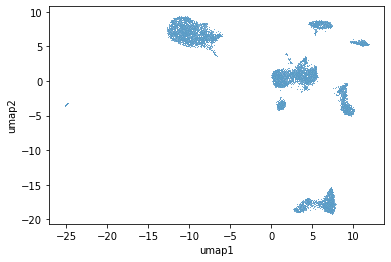

In [84]:
sns.scatterplot(data=rna_meta['cell'], x='umap1', y='umap2', s=1)

In [67]:
len(umap1), len(umap2)

(9432, 9432)

In [54]:
b

((4.938107467916076, 1.3518887705641003),)

In [26]:
rna_meta['gene'][rna_meta['gene'].Gene.str.decode('utf-8').str.contains('MYC')]

,Gene,Selected,mean,pca_feature_loadings,variance,variance_expected,variance_standardized
514,b'MYCBP',0.0,0.134542,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.145718,0.157249,0.926671
528,b'MYCL',1.0,0.155852,"(0.02705160885095213, 0.002109840026997199, 0....",0.229339,0.183088,1.252615
2010,b'MYCN',1.0,0.000530,"(-0.0001584568806214149, -0.000265418464237228...",0.000742,0.000547,1.356136
6654,b'MYCT1',1.0,0.002014,"(0.00023781756879499936, 0.0001622022934740184...",0.004555,0.002193,1.869349
8744,b'MYC',1.0,0.388253,"(-0.015533098776969897, -0.004508989621225003,...",0.654885,0.518722,1.262496
12555,b'MYCBP2',0.0,1.118003,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.635634,2.090932,0.782251
15740,b'MYCBPAP',0.0,0.005831,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.006222,0.006563,0.947992


In [41]:
rna = pd.HDFStore(f'{path}/{filename}')
rna.keys()
# Pandas only knows HDF produced by itself.

[]

In [52]:
!pip install h5sparse
import h5sparse

# Evne h5sparse cannot recognize this `sparse matrix`

In [53]:
h5f = h5sparse.File(f'{path}/{filename}')

In [70]:
visit_h5(f=h5f)


group /col_attrs 14 members
/col_attrs/CellID (9432,)
/col_attrs/ClusterID (9432,)
/col_attrs/ClusterName (9432,)
/col_attrs/RNA_snn_res_0_4 (9432,)
/col_attrs/celltype (9432,)
/col_attrs/nCount_RNA (9432,)
/col_attrs/nFeature_RNA (9432,)
/col_attrs/observed (9432,)
/col_attrs/orig_ident (9432,)
/col_attrs/pca_cell_embeddings (9432, 100)
/col_attrs/percent_mito (9432,)
/col_attrs/simulated (9432,)
/col_attrs/tsne_cell_embeddings (9432, 2)
/col_attrs/umap_cell_embeddings (9432, 2)

group /col_graphs 2 members

group /col_graphs/RNA_nn 3 members
/col_graphs/RNA_nn/a (282960,)
/col_graphs/RNA_nn/b (282960,)
/col_graphs/RNA_nn/w (282960,)

group /col_graphs/RNA_snn 3 members
/col_graphs/RNA_snn/a (1257370,)
/col_graphs/RNA_snn/b (1257370,)
/col_graphs/RNA_snn/w (1257370,)

group /layers 2 members
/layers/norm_data (19089, 9432)
/layers/scale_data (19089, 9432)
/matrix (19089, 9432)

group /row_attrs 7 members
/row_attrs/Gene (19089,)
/row_attrs/Selected (19089,)
/row_attrs/mean (19089,)
/

In [72]:
h5f['matrix'][1:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 

# 

## atac_v1_pbmc_10k_singlecell.tsv

In [91]:
atac_single_cell = pd.read_csv(f'{path}/atac_v1_pbmc_10k_singlecell.csv')

In [92]:
atac_single_cell

,barcode,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,cell_id,is__cell_barcode,TSS_fragments,DNase_sensitive_region_fragments,enhancer_region_fragments,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments
0,NO_BARCODE,8335327,3922818,71559,746476,634014,22972,2937488,None,0,0,0,0,0,0,0,0
1,AAACGAAAGAAACGCC-1,3,1,0,1,0,0,1,None,0,1,1,1,0,1,0,1
2,AAACGAAAGAAAGCAG-1,14,1,0,4,2,0,7,None,0,0,2,0,0,2,0,0
3,AAACGAAAGAAAGGGT-1,7,1,0,1,0,0,5,None,0,2,2,0,1,2,0,1
4,AAACGAAAGAAATACC-1,9880,5380,79,106,1120,6,3189,None,0,386,1623,297,107,1758,16,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614491,TTTGTGTTCTTGTACT-1,47,2,0,0,4,0,41,None,0,11,31,9,8,32,0,20
614492,TTTGTGTTCTTGTCGC-1,1,0,0,0,0,0,1,None,0,0,0,0,0,0,0,0
614493,TTTGTGTTCTTGTGCC-1,23379,9625,160,115,1232,20,12227,_cell_8727,1,6321,10005,2560,5242,10523,24,8309
614494,TTTGTGTTCTTTATCG-1,2,1,0,0,0,0,1,None,0,0,0,0,0,0,0,0


In [95]:
atac_single_cell.barcode.is_unique

True